#Мамоу Асман ИУ5-64Б НИРС ТМО

## Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных, которые относятся к домам, найденных в данном округе Калифорнии, и некоторой сводной статистике о них, основанной на данных переписи населения 1990 года - https://www.kaggle.com/datasets/camnugent/california-housing-prices

Датасет содержит следующие столбцы:
1. longitude: показатель того, насколько далеко на запад расположен дом; большее значение указывает на то, что он находится дальше к западу
2. latitude: показатель того, насколько далеко на север расположен дом; большее значение указывает на то, что он находится дальше к северу
3. housing Median Age: Средний возраст дома в квартале; меньшее количество - это более новое здание
4. total Rooms: Общее количество комнат в квартале
5. total Bedrooms: Общее количество спален в квартале
6. population: Общее количество людей, проживающих в квартале
7. households: Общее количество домохозяйств, группа людей, проживающих в пределах жилого помещения, для квартала
8. median Income: Средний доход домохозяйств в пределах квартала (измеряется в десятках тысяч долларов США)
9. median House Value: Средняя стоимость дома для домохозяйств в пределах квартала (измеряется в долларах США)
10. Ocean Proximity: Расположение дома рядом с океаном/морем

### Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [ ]:
#считаем файл целиком
df = pd.read_csv('housing.csv')

# Удалим дубликаты записей, если они присутствуют
df = df.drop_duplicates()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасетов

In [ ]:
# Первые 5 строк датасета
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Размер датасета - 20640 строки, 10 колонок
df.shape

(20640, 10)

In [ ]:
# Список колонок
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# Список колонок с типами данных
# убедимся что типы данных одинаковы в обучающей и тестовых выборках
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
# Проверим наличие пустых значений
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Вывод. Представленный набор данных содержит пустые значения**

###Заполним пустые значения

In [ ]:
# Заполнение пропусков
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [ ]:
# Проверим наличие пустых значений
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Вывод. Представленный набор данных более не содержит пропусков ни в обучающей, ни в тестовой выборках.**

### Построение графиков для понимания структуры данных

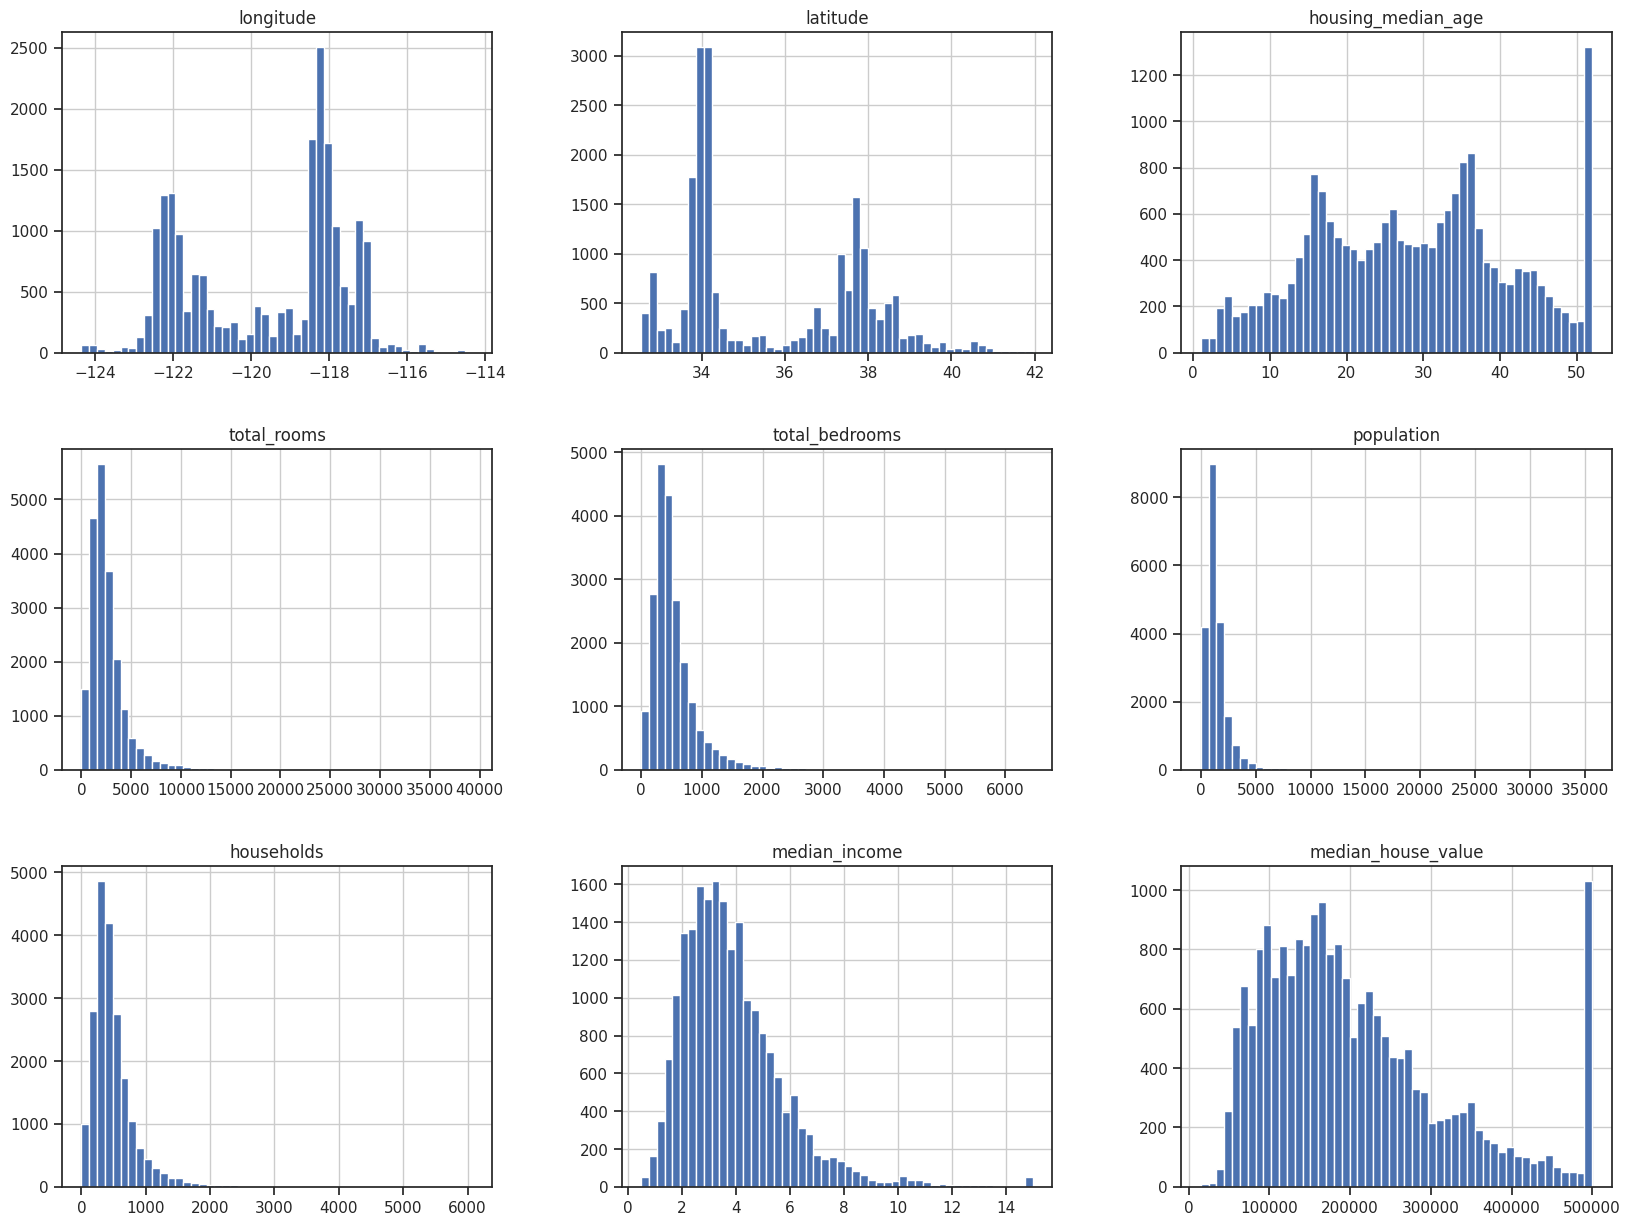

In [ ]:
# Гистограммы распределения численных признаков
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Взаимосвязь признаков
sns.pairplot(df)
plt.show()

## Выбор признаков, кодирование категориальных признаков, масштабирование данных, формирование вспомогательных признаков

1. Выделение целевой переменной и признаков:

In [ ]:
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']

2. Кодирование категориальных признаков и масштабирование данных:

In [ ]:
# Кодирование категориальных данных
numeric_features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
categorical_features = ["ocean_proximity"]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(X)

3. Создание вспомогательных признаков:

In [ ]:
# Вспомогательные признаки (добавление новых признаков)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

##Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.

1. Построение корреляционной матрицы:

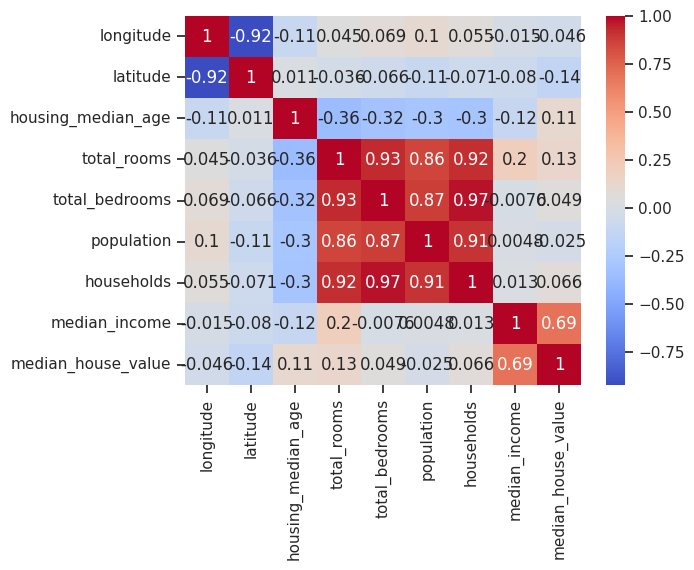

In [ ]:
# Удаление категориального признака перед расчетом корреляционной матрицы
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

2. Выявление сильной корреляции

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

##Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.

1. Метрики для регрессии:
    - МАСЭ (Mean Absolute Error, MAE)
    - Среднеквадратичная ошибка (Mean Squared Error, MSE)
    - R-квадрат (R²)

In [ ]:
def evaluate_model(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return {'MAE': mae, 'MSE': mse, 'R2': r2}

##Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.

Рассмотрим следующие модели:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor (ансамблевая модель)
4. Gradient Boosting Regressor (ансамблевая модель)
5. Support Vector Regressorr

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Reg': SVR()
}

##Формирование обучающей и тестовой выборок на основе исходного набора данных.

1. Разделение данных на обучающую и тестовую выборки:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

1. Оценка моделей без подбора гиперпараметров:

In [ ]:
baseline_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    baseline_results[name] = {
        'MAE': mean_absolute_error(y_test, predictions),
        'MSE': mean_squared_error(y_test, predictions),
        'R2': r2_score(y_test, predictions)
    }

print(pd.DataFrame(baseline_results).transpose())

                             MAE           MSE        R2
Linear Regression   50670.738241  4.908477e+09  0.625424
Decision Tree       43461.065649  4.671219e+09  0.643530
Random Forest       31666.724906  2.400206e+09  0.816835
Gradient Boosting   38249.722460  3.122390e+09  0.761724
Support Vector Reg  87041.979369  1.366959e+10 -0.043154


##Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

1. Подбор гиперпараметров с использованием GridSearchCV:

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


2. Подбор гиперпараметров и оценка моделей:

In [ ]:
optimized_rf = RandomForestRegressor(**grid_search_rf.best_params_)
optimized_rf.fit(X_train, y_train)
predictions = optimized_rf.predict(X_test)

optimized_results = {
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'R2': r2_score(y_test, predictions)
}

print(pd.DataFrame([optimized_results], index=['Optimized Random Forest']))

                                  MAE           MSE        R2
Optimized Random Forest  31674.576895  2.406131e+09  0.816383


##Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

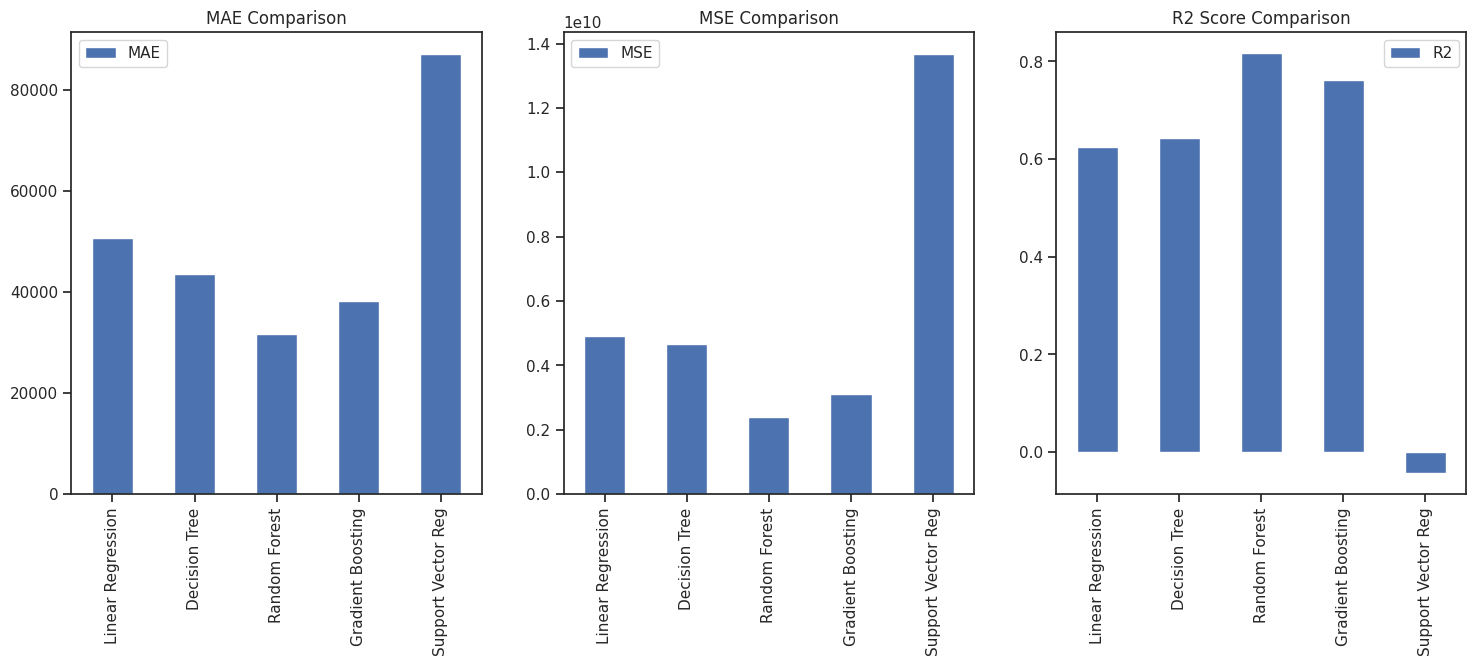

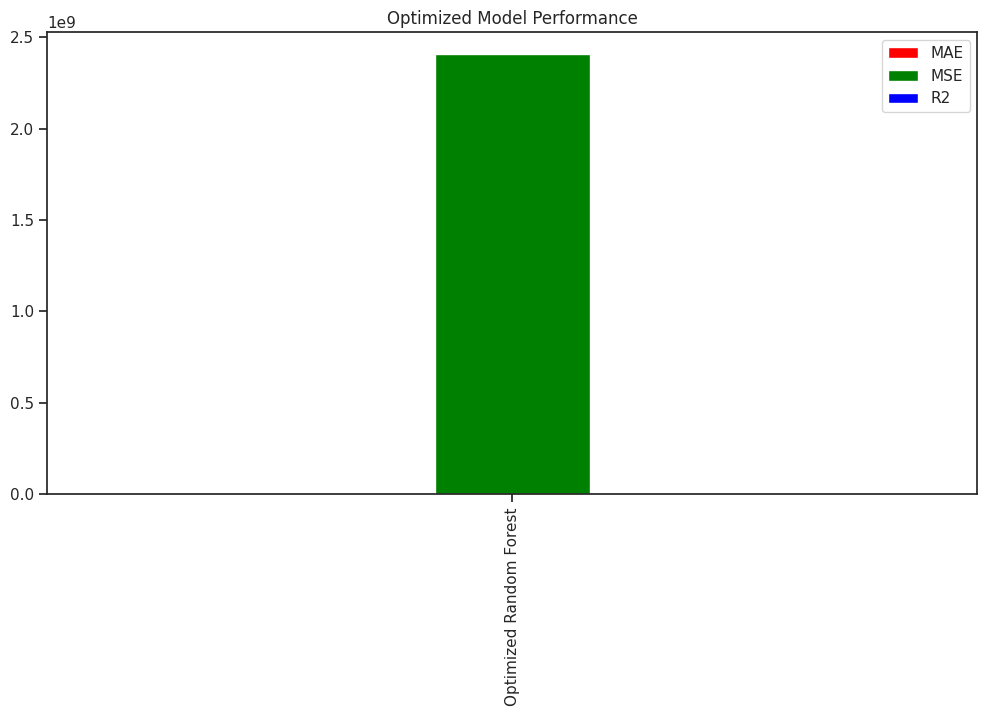

In [ ]:
# Сравнение метрик графически
baseline_df = pd.DataFrame(baseline_results).transpose()
optimized_df = pd.DataFrame([optimized_results], index=['Optimized Random Forest'])
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
baseline_df[['MAE']].plot(kind='bar', ax=axes[0], title='MAE Comparison')
baseline_df[['MSE']].plot(kind='bar', ax=axes[1], title='MSE Comparison')
baseline_df[['R2']].plot(kind='bar', ax=axes[2], title='R2 Score Comparison')

optimized_df[['MAE','MSE','R2']].plot(kind='bar', title='Optimized Model Performance', figsize=(12,6), color=['red', 'green', 'blue'])

plt.show()